In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
data=pd.read_csv("Admission_Predict.csv")
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


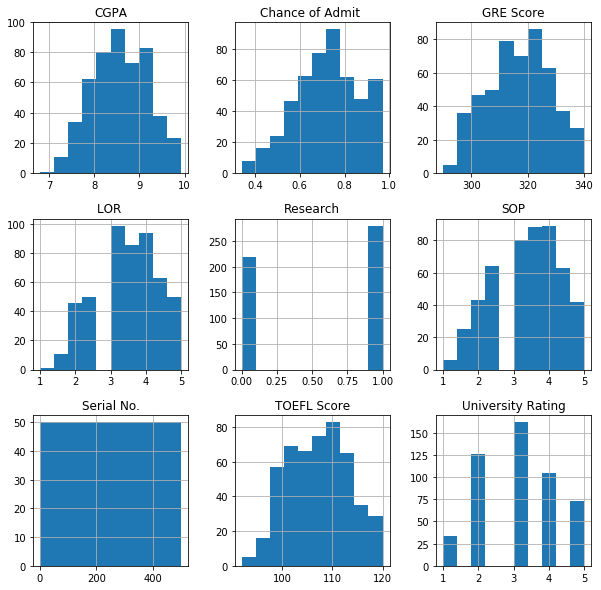

In [3]:
data.hist(figsize = (10,10))
plt.show()

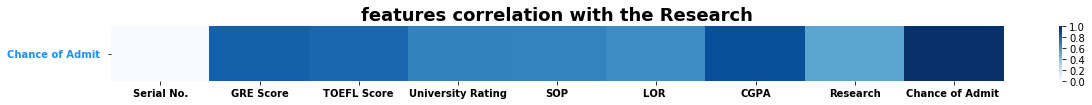

In [4]:
import seaborn as sns
corr = data.corr()
f,ax=plt.subplots(figsize=(20,1))
sns.heatmap(corr.sort_values(by=['Chance of Admit '],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Research", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [5]:
real_x=data.iloc[:,1:-1].values
real_y=data.iloc[:,-1].values

In [6]:
reg=DecisionTreeRegressor(random_state=0)
reg.fit(real_x,real_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [7]:
real_x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [8]:
x=[337,118,4,4.5,4.5,9.65,1]

In [9]:
pred_y=reg.predict([x])
pred_y

array([0.92])

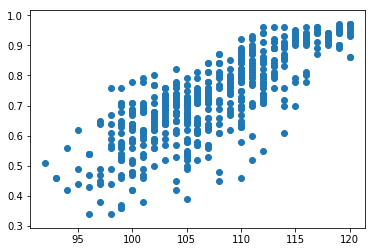

In [10]:
plt.scatter(real_x[:,1],real_y)

In [11]:
x1=[320,116,4,5,4.5,10,1]
pred_y=reg.predict([x1])
pred_y

array([0.92])

In [12]:
x2=[317,107,4,4,3,8.7,0]
pred_y1=reg.predict([x2])
pred_y1

array([0.66])

# RANDOM FOREST ALGO

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
reg1=RandomForestRegressor(n_estimators=100,random_state=0)
reg1.fit(real_x,real_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [91]:
y_pred=reg1.predict([[308,101,2,3,4,7.9,0]])
y_pred

array([0.6381])

In [105]:
y_pred=reg1.predict([[317,107,3,4,3,8.7,0]])
y_pred

array([0.6963])